In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [2]:
heart_data=pd.read_csv("heart.csv")

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

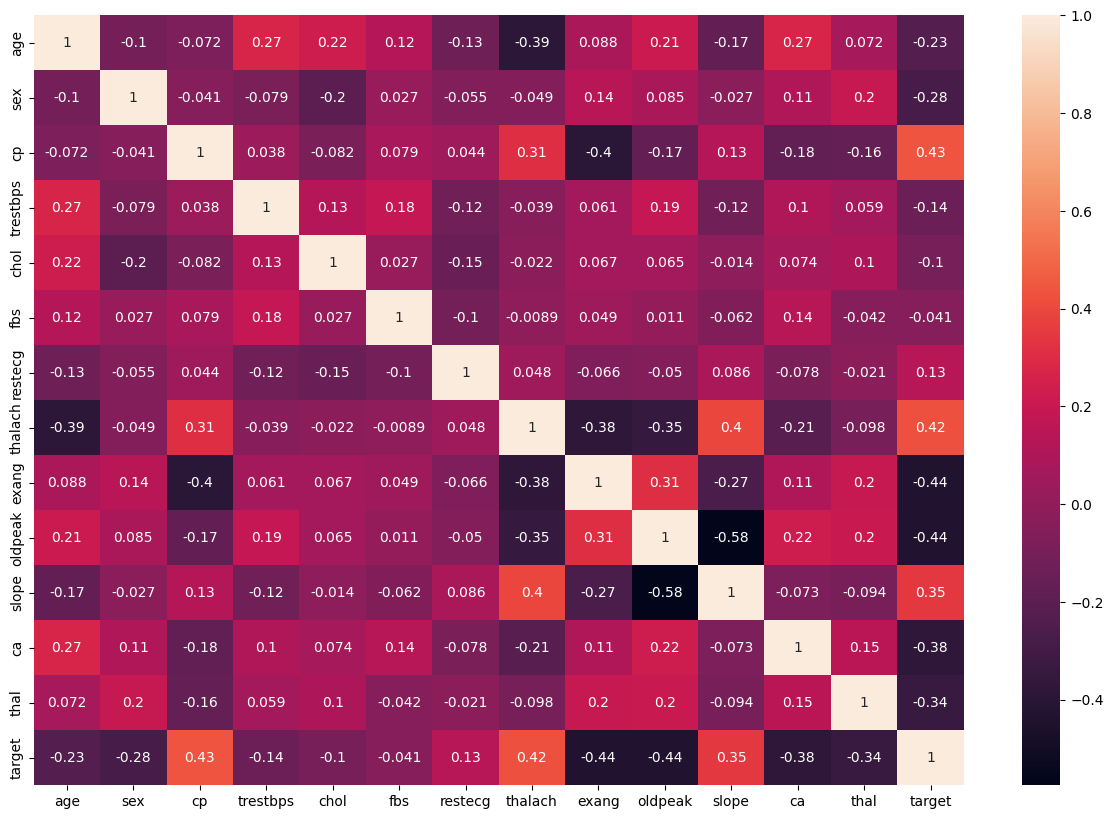

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_data.corr(),annot=True)
plt.show()

In [7]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
y=heart_data['target']
X=heart_data.drop(['target'],axis=1)

In [9]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [10]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor="loss")# early stop patience
 #verbose set to 1 will show the training process
 

In [12]:
history = ann.fit(X_train, y_train,
          batch_size=32,
          epochs=55,
          verbose=0)

In [13]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)


7/7 [==============================] - 0s 0s/step


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[88 12]
 [ 7 98]]
Accuracy: 90.73%


In [15]:
import random
import numpy as np
from keras.optimizers import Adam
import tensorflow as tf

def evaluate_fitness(hyperparameters):
   ann = tf.keras.models.Sequential()
   ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
   ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
   ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
   ann.compile(optimizer=Adam(learning_rate=hyperparameters["learning_rate"]), loss='binary_crossentropy', metrics=['accuracy'])
   print("--------------------------------------------------------------------------")
   ann.fit(X_train, y_train, batch_size=hyperparameters["batch_size"], epochs=hyperparameters["epochs"])
   print("--------------------------------------------------------------------------")
   _, accuracy = ann.evaluate(X_test, y_test)
   return accuracy

# Define the bounds for hyperparameters
LEARNING_RATE_BOUNDS = [0.0001, 0.1]
EPOCHS_BOUNDS = [10, 100]
BATCH_SIZE_BOUNDS = [32, 256]

# Initialize the pheromone matrix and the best pheromone trail
pheromone_matrix = np.ones((len(LEARNING_RATE_BOUNDS), len(EPOCHS_BOUNDS), len(BATCH_SIZE_BOUNDS)))
best_pheromone_trail = np.ones_like(pheromone_matrix)

# Define the number of ants and iterations
num_ants = 10
max_iterations = 50

# Define the pheromone update parameters for MMAS
pheromone_rho = 0.02  # Evaporation rate
pheromone_min = 0.1   # Minimum pheromone value
pheromone_max = 2.0   # Maximum pheromone value

# Initialize the best accuracy and corresponding hyperparameters
best_accuracy = 0.0
best_hyperparameters = {}

# Perform iterations
for iteration in range(max_iterations):
    # Initialize the accuracy and hyperparameters for each ant
    ant_accuracies = []
    ant_hyperparameters = []

    # Simulate the behavior of each ant
    for ant in range(num_ants):
        # Select hyperparameters probabilistically based on pheromone values and a heuristic function
        pheromone_probs = pheromone_matrix.flatten() / np.sum(pheromone_matrix.flatten())
        index = np.random.choice(len(pheromone_probs), p=pheromone_probs)
        learning_rate_index, epochs_index, batch_size_index = np.unravel_index(index, pheromone_matrix.shape)

        learning_rate = np.linspace(LEARNING_RATE_BOUNDS[0], LEARNING_RATE_BOUNDS[1], num=num_ants)[learning_rate_index]
        epochs = np.linspace(EPOCHS_BOUNDS[0], EPOCHS_BOUNDS[1], num=num_ants, dtype=int)[epochs_index]
        batch_size = np.linspace(BATCH_SIZE_BOUNDS[0], BATCH_SIZE_BOUNDS[1], num=num_ants, dtype=int)[batch_size_index]

        hyperparameters = {
            "learning_rate": learning_rate,
            "epochs": epochs,
            "batch_size": batch_size
        }

        # Evaluate the accuracy of the ANN model using the selected hyperparameters
        accuracy = evaluate_fitness(hyperparameters)

        # Update the pheromone matrix based on the accuracy obtained
        pheromone_matrix *= (1.0 - pheromone_rho)
        pheromone_matrix[learning_rate_index, epochs_index, batch_size_index] += accuracy

        # Update the best accuracy and corresponding hyperparameters if a new best is found
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = hyperparameters

    # Update the best pheromone trail
    best_pheromone_trail = np.maximum(best_pheromone_trail, pheromone_matrix)

    # Evaporate the pheromone values to ensure they are within the specified bounds
    pheromone_matrix = np.clip(pheromone_matrix, pheromone_min, pheromone_max)

# Print the best accuracy and corresponding hyperparameters
print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)


--------------------------------------------------------------------------
Epoch 1/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7273 - accuracy: 0.4098
Epoch 2/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7240 - accuracy: 0.4098
Epoch 3/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7208 - accuracy: 0.4159
Epoch 4/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7176 - accuracy: 0.4244
Epoch 5/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7146 - accuracy: 0.4293
Epoch 6/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.4354
Epoch 7/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.4354
Epoch 8/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.4476
Epoch 9/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7032 - accuracy: 0.4585
Epoch 10/10
15/15 [========================

In [16]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = Adam(learning_rate=best_hyperparameters["learning_rate"]), loss = 'binary_crossentropy', metrics = ['accuracy'])
print("--------------------------------------------------------------------------")
ann.fit(X_train, y_train, batch_size=best_hyperparameters["batch_size"], epochs=best_hyperparameters["epochs"])
print("--------------------------------------------------------------------------")
_,accuracy = ann.evaluate(X_test, y_test)

--------------------------------------------------------------------------
Epoch 1/20
26/26 [==============================] - 0s 833us/step - loss: 0.5855 - accuracy: 0.6915
Epoch 2/20
26/26 [==============================] - 0s 917us/step - loss: 0.3875 - accuracy: 0.8293
Epoch 3/20
26/26 [==============================] - 0s 838us/step - loss: 0.3369 - accuracy: 0.8585
Epoch 4/20
26/26 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8707
Epoch 5/20
26/26 [==============================] - 0s 918us/step - loss: 0.2887 - accuracy: 0.8756
Epoch 6/20
26/26 [==============================] - 0s 918us/step - loss: 0.2800 - accuracy: 0.8780
Epoch 7/20
26/26 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.8951
Epoch 8/20
26/26 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.8829
Epoch 9/20
26/26 [==============================] - 0s 945us/step - loss: 0.2326 - accuracy: 0.9049
Epoch 10/20
26/26 [============

In [17]:
print(f"Best Parameters: {best_hyperparameters}")
val_loss, val_acc=ann.evaluate(X_test,y_test)
print(f"Accuracy: {val_acc}" )

Best Parameters: {'learning_rate': 0.0112, 'epochs': 20, 'batch_size': 32}
7/7 [==============================] - 0s 1ms/step - loss: 0.2319 - accuracy: 0.9073
Accuracy: 0.9073171019554138
